In [1]:
import sys
import time

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay
# import seaborn as sns
# sns.set()
from sklearn import tree
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

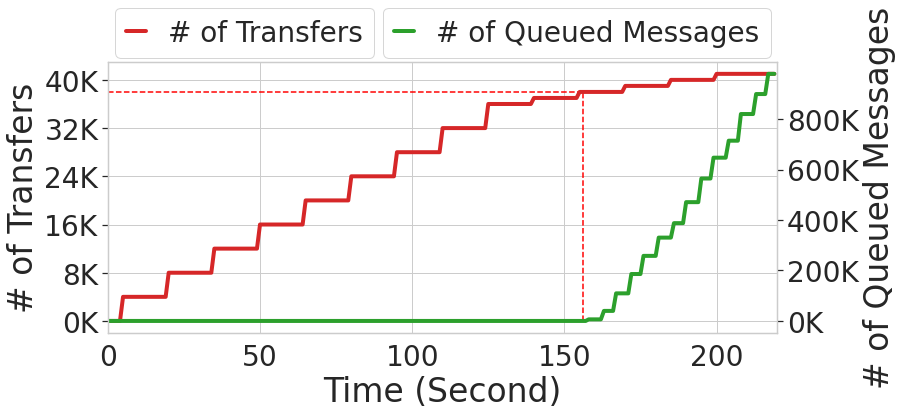

In [115]:
# cloud_file = "./cloud_scalability/10k_per_s_1ls_5es_grok_all_metrics_.csv"
cloud_file = "./cloud_scalability/4K_per_s_1LS_5es_grok_all_metrics_AmazonC6a.csv"

dtype_dic= { '@timestamp per second':str, 'Count of records':float, 'Rabbit queue lenght':float}
cloud_file_data = pd.read_csv(cloud_file, dtype = dtype_dic).fillna(0)
# cloud_file_data.iloc[:, 1]
# cloud_file_data.iloc[:, 2]
from matplotlib.pyplot import figure
from matplotlib import pyplot as plt
sns.set_style("whitegrid")
sns.set_palette("Set1")

x_max = 220
# x_range = np.arange(0, cloud_file_data.shape[0] , 1)
x_range = np.arange(0, x_max , 1)
lw=4

fig, ax = plt.subplots(figsize =(12, 5))
ax.set_ylabel('# of Transfers', fontsize=33)
ax.set_xlabel('Time (Second)', fontsize=33)
ax.plot(x_range, cloud_file_data.iloc[:x_max, 1],'-', label="# of Transfers", color='tab:red', linewidth=lw)#,color='tab:red'

# ax.set_xlim([0, max(244)])

plt.yticks(np.arange(0, np.max(cloud_file_data.iloc[:x_max, 1] + 3000), 8000),  fontsize=28)
ax_ylabels = ['{}K'.format(int(y)) for y in plt.yticks()[0]/1000]
ax.set_yticklabels(ax_ylabels)

plt.xticks(x_range[::50],  fontsize=28)
plt.xlim([0, x_max])


plt.legend(fontsize=28, framealpha=0.8, handlelength=0.7, loc='upper left', bbox_to_anchor=(-0.01, 1.25))
ax2 = ax.twinx()
ax2.grid(False)
ax2.set_ylabel('# of Queued Messages', fontsize=33)
line1, = ax2.plot(x_range, cloud_file_data.iloc[:x_max, 2], '-', label="# of Queued Messages", color='tab:green', linewidth=lw)
plt.legend(fontsize=28, handles=[line1], handlelength=0.7,  framealpha=0.8, loc='upper left', bbox_to_anchor=(0.39, 1.25))

plt.yticks(np.arange(0, np.max(cloud_file_data.iloc[:x_max, 2] + 5000), 200000),  fontsize=28)
ax2_ylabels = ['{}K'.format(int(y)) for y in plt.yticks()[0]/1000]
ax2.set_yticklabels(ax2_ylabels)

# Choose a point to highlight
highlight_point_index = 2
highlight_point_x = 156
highlight_point_y = 38000

# Draw a vertical line to the y-axis to show the y-value of the highlighted point
ax.vlines(highlight_point_x, 0, highlight_point_y, colors='red', linestyles='dashed')
ax.hlines(highlight_point_y, 0, highlight_point_x, colors='red', linestyles='dashed')
# Add a label for the highlighted point
# ax.annotate(f"{int(highlight_point_y/1000)} K",
#             xy=(highlight_point_x, highlight_point_y),
#             xytext=(highlight_point_x-10, highlight_point_y + 1000), fontsize=20)
# plt.savefig('Cloud_scaling_evaluation_LS_AMZN_14metrics.pdf', bbox_inches='tight')

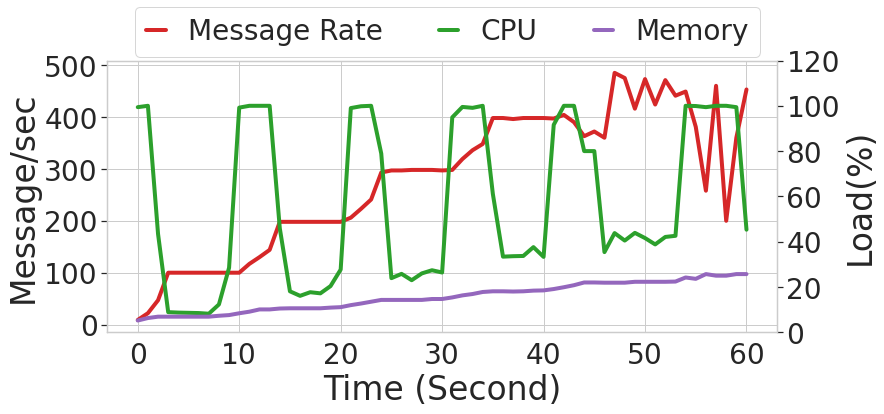

In [147]:
# agent_scaling_file = "./agent_scalability/200 and more transfer/data.csv"
agent_scaling_file = "./share_memory_design/agent_scaling/untitled (3).csv"
agent_scaling_file = "./share_memory_design/agent_scaling/400.csv"
agent_scaling_file = "./agentscaling/AgentEvaluation.csv"
# agent_scaling_file = "./agentscaling/untitled.csv"

agent_scaling_file = pd.read_csv(agent_scaling_file).fillna(0)
# agent_scaling_file.iloc[:160, 3].mean()
agent_scaling_file.shape[0]
from matplotlib.pyplot import figure
from matplotlib import pyplot as plt
sns.set_style("whitegrid")
sns.set_palette("Set1")

# x_range = np.arange(0, agent_scaling_file.shape[0] , 1)
max_x =61
x_range = np.arange(0,max_x , 1)
lw=4

fig, ax = plt.subplots(figsize =(12, 5))
ax.set_ylabel('Message/sec', fontsize=33)
ax.set_xlabel('Time (Second)', fontsize=33)
line1, = ax.plot(x_range, agent_scaling_file.iloc[:max_x, 3],'-', label="Message Rate", color='tab:red', linewidth=lw)#,color='tab:red'
plt.yticks(np.arange(0, np.max(agent_scaling_file.iloc[:max_x, 3] + 50), 100),  fontsize=28)
plt.xticks(x_range[::10],  fontsize=28)
# plt.legend(fontsize=28, framealpha=0.8, handlelength=0.7, loc='upper left', bbox_to_anchor=(0, 1.25))


ax2 = ax.twinx()
ax2.grid(False)
ax2.set_ylabel('Load(%)', fontsize=33)
# line2, = ax2.plot(x_range[::5], agent_scaling_file.iloc[::5, 1], '-', label="CPU Load (%)", color='tab:green', linewidth=lw)
line2, = ax2.plot(x_range, agent_scaling_file.iloc[:max_x, 2], '-', label="CPU", color='tab:green', linewidth=lw)

# line3, = ax2.plot(x_range[::5], agent_scaling_file.iloc[::5, 2], '-', label="Memory Load (%)", color='tab:purple', linewidth=lw)
line3, = ax2.plot(x_range, agent_scaling_file.iloc[:max_x, 1], '-', label="Memory", color='tab:purple', linewidth=lw)
plt.legend(fontsize=28, handles=[line1, line2, line3],ncol=3,  handlelength=0.7,  framealpha=0.8, loc='upper left', bbox_to_anchor=(0.02, 1.25))

plt.yticks(np.arange(0, 121, 20),  fontsize=28)

# plt.savefig('Agent_scaling_evaluation_400.pdf', bbox_inches='tight')
plt.savefig('Agent_scaling_evaluation_400_14metrics.pdf', bbox_inches='tight')

In [127]:
globus_footprint_file = "./agent_scalability/200 and more transfer/globus_overhead_over_time.csv"
globus_footprint_file = pd.read_csv(globus_footprint_file, header=None).fillna(0)
globus_footprint_file
print(globus_footprint_file.mean())
print(np.max(globus_footprint_file[1]), np.max(globus_footprint_file[2]))
# from matplotlib.pyplot import figure
# from matplotlib import pyplot as plt
# sns.set_style("whitegrid")
# sns.set_palette("Set1")
#
# x_range = np.arange(0, globus_footprint_file.shape[0] , 1)
# lw=4
#
# fig, ax = plt.subplots(figsize =(12, 5))
# ax.set_ylabel('# Transfers', fontsize=33)
# ax.set_xlabel('Time (Second)', fontsize=33)
# line1, = ax.plot(x_range, globus_footprint_file.iloc[:, 0],'-', label="#Transfers", color='tab:red', linewidth=lw)#,color='tab:red'
# plt.yticks(np.arange(0, np.max(globus_footprint_file.iloc[:, 0] + 50), 50),  fontsize=28)
# plt.xticks(x_range[::50],  fontsize=28)
#
# ax2 = ax.twinx()
# ax2.grid(False)
# ax2.set_ylabel('Load(%)', fontsize=33)
# line2, = ax2.plot(x_range, globus_footprint_file.iloc[:, 1], '-', label="CPU", color='tab:green', linewidth=lw)
# # line2, = ax2.plot(x_range[::5], globus_footprint_file.iloc[::5, 1], '-', label="CPU", color='tab:green', linewidth=lw)
#
# line3, = ax2.plot(x_range, globus_footprint_file.iloc[:, 2], '-', label="Memory", color='tab:purple', linewidth=lw)
# # line3, = ax2.plot(x_range[::5], globus_footprint_file.iloc[::5, 2], '-', label="Memory", color='tab:purple', linewidth=lw)
# plt.legend(fontsize=28, handles=[line1, line2, line3],ncol=3,  handlelength=0.7,  framealpha=0.8, loc='upper left', bbox_to_anchor=(0.02, 1.25))


0    127.6000
1      2.0824
2      3.8388
dtype: float64
3.5 4.4


In [124]:
single_agent_over_head = "./Single monitoring process/CPU_MEM_USAGE_single_monitoring_31894-optimized.csv"
single_agent_over_head_file = pd.read_csv(single_agent_over_head, header=None).fillna(0)
print(single_agent_over_head_file.mean())

agent_over_head = "./Single monitoring process/overhead_footprints.csv"
agent_over_head_file = pd.read_csv(agent_over_head).fillna(0)
print(agent_over_head_file.mean())

FileNotFoundError: [Errno 2] No such file or directory: './Single monitoring process/CPU_MEM_USAGE_single_monitoring_31894-optimized.csv'

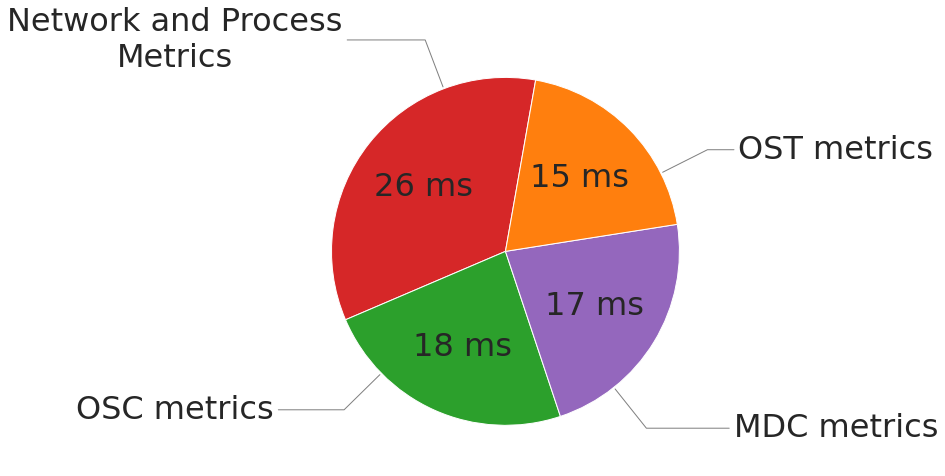

In [237]:
from matplotlib import pyplot as plt
sns.set_style("whitegrid")
sns.set_palette("Set1")

fig, ax = plt.subplots(figsize =(14, 8), subplot_kw=dict(aspect="equal"))
# ax.axis('equal')
colors = ['tab:red', 'tab:green', 'tab:purple', 'tab:orange']
# colors = ['tab:red', 'tab:green', 'tab:orange']
langs = ['Network and Process\nMetrics',  'OSC metrics', 'MDC metrics', 'OST metrics']
# langs = ['Network and Process\nMetrics',  'OSC metrics', 'OST metrics']
# processing_times = [0.014, 0.013, 0.41, 0.39]
# processing_times = [14, 13, 41, 39, 14]
processing_times = [26, 18, 17, 15]
# processing_times = [9, 1, 4]

def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return "{:d} ms".format(absolute)
wedges, texts, _ = ax.pie(processing_times, autopct=lambda pct: func(pct, processing_times), startangle=80, colors=colors, textprops={'fontsize': 32}) #wedgeprops=dict(width=0.2)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-", color="0.5"), zorder=0, va="center", fontsize=32)
for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/4+ p.theta1
    # print(ang)
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "center", 1: "center"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(langs[i], xy=(x, y), xytext=(1.9*np.sign(x), 1.3*y), horizontalalignment=horizontalalignment, **kw)

plt.savefig('collection_time_chart.pdf', bbox_inches='tight')
# plt.savefig('collection_time_chart_14metrics.pdf', bbox_inches='tight')

In [23]:
path = "new_design/profiling/10transfer/*"
import glob
files = glob.glob(path)
for file in files:
    csv = pd.read_csv(file, header=None).fillna(0)
    print(file, "\t", csv.iloc[178, 4], csv.iloc[123, 4], csv.iloc[151, 4], csv.iloc[126, 4], csv.iloc[136, 4], csv.iloc[127, 4], csv.iloc[130, 4], csv.iloc[144, 4])

new_design/profiling/10transfer/2679_profile_data.csv 	 0.021 0.001 0.001 0.013 0.008 0.013 0.001 0.013
new_design/profiling/10transfer/2661_profile_data.csv 	 0.023 0.001 0.002 0.013 0.013 0.014 0.006 0.013
new_design/profiling/10transfer/2674_profile_data.csv 	 0.024 0.001 0.002 0.013 0.013 0.014 0.009 0.013
new_design/profiling/10transfer/2705_profile_data.csv 	 0.023 0.001 0.002 0.013 0.013 0.014 0.011 0.013
new_design/profiling/10transfer/2671_profile_data.csv 	 0.023 0.001 0.002 0.013 0.013 0.014 0.011 0.013
new_design/profiling/10transfer/2686_profile_data.csv 	 0.022 0.001 0.002 0.013 0.010 0.014 0.002 0.013
new_design/profiling/10transfer/2690_profile_data.csv 	 0.022 0.001 0.001 0.013 0.010 0.013 0.002 0.013
new_design/profiling/10transfer/2682_profile_data.csv 	 0.016 0.001 0.001 0.012 0.001 0.012 0.001 0.001
new_design/profiling/10transfer/2666_profile_data.csv 	 0.022 0.001 0.001 0.013 0.01 0.014 0.002 0.013
new_design/profiling/10transfer/2662_profile_data.csv 	 0.024 0.0